In [ ]:
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# print(plt.style.available)
plt.style.use('tableau-colorblind10')
sns.set_context('talk')
sns.set_style('whitegrid')

In [ ]:
def data_generating_process_2d():
  """Generated data from three normal distributions.
  Probability of being selected from each distribution is non-uniform.

  Returns:
    datum (tuple): a single data point
  """
  distribution_selector = np.random.rand() # Random float in [0 1)

  # We will use the identity matrix
  noise = 4 # Bigger numbers will increase variance
  cov_identity = np.eye(2) * noise

  assert distribution_selector >= 0
  assert distribution_selector <= 1
  if distribution_selector < 0.3:
    datum = np.random.multivariate_normal(
        mean=np.array([5,10]),
        cov=cov_identity,
        check_valid='raise',
    )
    true_distribution = 0
  elif distribution_selector < 0.7:
    datum = np.random.multivariate_normal(
        mean=np.array([10,15]),
        cov=cov_identity,
        check_valid='raise',
    )
    true_distribution = 1
  else:
    datum = np.random.multivariate_normal(
        mean=np.array([12,12]),
        # Let's make them correlate
        cov=np.array([[1, 0.5],
                      [0.5, 1]]),
        check_valid='raise',
    )
    true_distribution = 2
  return (datum, true_distribution)

(0.0, 20.0)

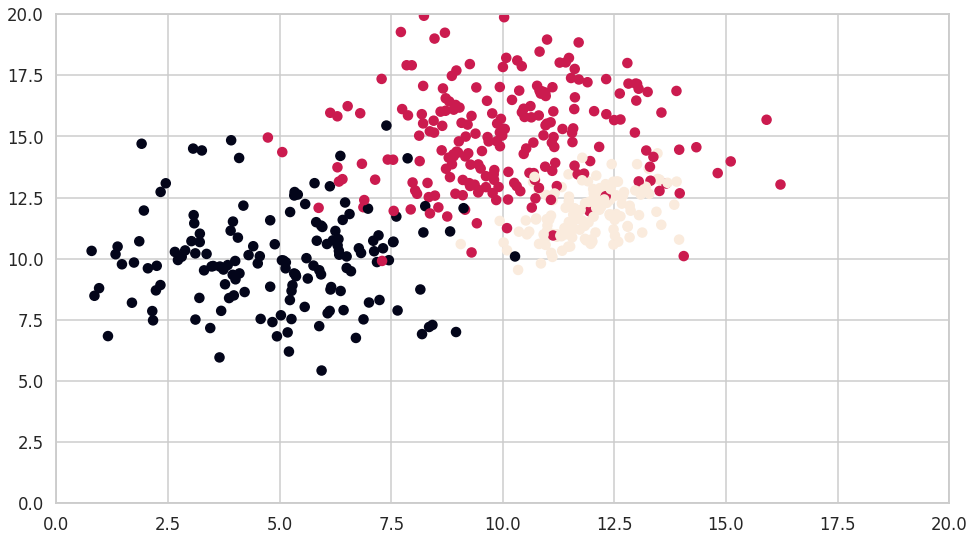

In [ ]:
data = []
for i in range(500):
  data.append(data_generating_process_2d())

coords, labels = zip(*data)


fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(*zip(*coords), c=labels)
ax.set_xlim(left=0, right=20)
ax.set_ylim(bottom=0, top=20)

In [ ]:
class KMeans:
  """ Implements k-means clustering algorithm
  """
  def __init__(self, k, data):
    assert k < len(data)
    self.k = k
    self.centroids = [None] * k
    self.data = data
    self.labels = [None] * len(data)
    self.converged = False
    
  
  def _initialise_centroids(self):
    # random.sample will return k unique data points.
    self.centroids = random.sample(self.data, self.k)


  def _label_data(self):
    distances = []
    for centroid in self.centroids:
      # Compute the distance between each point and the centroid.
      distances_to_current_centroid = np.linalg.norm(
          self.data-centroid,
          ord=2, # ord=2 for "standard" Euclidean norm.
          axis=1 # Norm for each row.
      )
      distances.append(distances_to_current_centroid)
    self.labels = np.argmin(distances, axis=0)


  def _update_centroids(self):
    centroids = []
    for centroid in range(len(self.centroids)):
      # import ipdb;ipdb.set_trace()
      new_centroid_loc = np.array(self.data)[self.labels==centroid].mean(axis=0)
      centroids.append(new_centroid_loc)
    self.centroids = centroids

In [ ]:
classifier = KMeans(k=5, data=coords)
classifier._initialise_centroids()
print(classifier.labels)
print(classifier.centroids)

fig, ax = plt.subplots(figsize=(16, 9))

# while not classifier.converged:
for i in range(10):
  classifier._label_data()
  classifier._update_centroids()

  plt.scatter(*zip(*classifier.centroids), c=np.unique(classifier.labels))
  ax.set_xlim(0,20)
  ax.set_ylim(0,20)
  time.sleep(0.5)
  fig.canvas.draw()
  print('yo')

